# Importing Required Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
nltk.download('punkt_tab')
nltk.download('stopwords')

from bs4 import BeautifulSoup
import string 
import re 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the DataSet

In [2]:
review = pd.read_csv(r"C:\Users\admin\Desktop\Python\Reviews.csv\Reviews.csv")


In [3]:
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
review.shape

(568454, 10)

In [5]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
#review['Score'] = review['Score'].astype(str) # no need 

### Selecting Random 50000 samples 

In [7]:
reviews = review.sample( n = 200000, random_state = 42) 

In [8]:
reviews.shape

(200000, 10)

In [9]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Selecting required Columns 

In [10]:
required_cols = ['Score','Text']

reviews = reviews[required_cols].reset_index(drop=True)


In [11]:
reviews.head()

,Score,Text
0,5,Having tried a couple of other brands of glute...
1,5,My cat loves these treats. If ever I can't fin...
2,3,A little less than I expected. It tends to ha...
3,2,"First there was Frosted Mini-Wheats, in origin..."
4,5,and I want to congratulate the graphic artist ...


# Checking for Null Values 


In [12]:
reviews.isnull().sum()

Score    0
Text     0
dtype: int64

# Text PreProcessing 

### Cleaning Text 

In [13]:
def cleaning(text):
    text = text.lower() # Converting all text in lower case 
    text = BeautifulSoup( text , 'lxml').get_text() # removes all HTML Tags 
    text = re.sub(r'[^a-z\s]',' ',text).split() # removes punctuations
    text = ' '.join(text).strip()
    return text
   

In [14]:
text = reviews['Text'][168]
processed_text= cleaning(text)

print(text+'\n\n',processed_text)

My cat gets one Whiskas Temptation treat whenever I do her nails. She's always been very compliant, but the treats have made her jello in my arms. Not so sure about the soft filling, because she swallows them whole. Ditto for tartar control. It doesn't do much for that . . . maybe would be different if my cat would chew them.

 my cat gets one whiskas temptation treat whenever i do her nails she s always been very compliant but the treats have made her jello in my arms not so sure about the soft filling because she swallows them whole ditto for tartar control it doesn t do much for that maybe would be different if my cat would chew them


### Tokenization

In [15]:
def tokenisation(text):
    tokens = word_tokenize(text)
    return tokens 

In [16]:
print(tokenisation(processed_text))

['my', 'cat', 'gets', 'one', 'whiskas', 'temptation', 'treat', 'whenever', 'i', 'do', 'her', 'nails', 'she', 's', 'always', 'been', 'very', 'compliant', 'but', 'the', 'treats', 'have', 'made', 'her', 'jello', 'in', 'my', 'arms', 'not', 'so', 'sure', 'about', 'the', 'soft', 'filling', 'because', 'she', 'swallows', 'them', 'whole', 'ditto', 'for', 'tartar', 'control', 'it', 'doesn', 't', 'do', 'much', 'for', 'that', 'maybe', 'would', 'be', 'different', 'if', 'my', 'cat', 'would', 'chew', 'them']


### Stop words removal

In [17]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    not_remove = {'no', 'not', 'nor', 'never', "don't", "doesn't", "didn't", 
    "won't", "can't", "couldn't", "shouldn't", "wouldn't", "isn't", "wasn't", "aren't", "haven't", "hasn't", "hadn't"}
    stop_words=stop_words - not_remove
    tokens =[ word for word in tokens if word not in stop_words ]
    return tokens    

In [18]:
print(remove_stopwords(tokenisation(processed_text)))

['cat', 'gets', 'one', 'whiskas', 'temptation', 'treat', 'whenever', 'nails', 'always', 'compliant', 'treats', 'made', 'jello', 'arms', 'not', 'sure', 'soft', 'filling', 'swallows', 'whole', 'ditto', 'tartar', 'control', 'much', 'maybe', 'would', 'different', 'cat', 'would', 'chew']


### Lemmatisation

In [19]:
def lemmatisation(tokens):
    lemma=WordNetLemmatizer()
    tokens = [lemma.lemmatize(word, pos ='v') for word in tokens]
    #tokens = [lemma.lemmatize(word, pos ='a') for word in tokens]
    #tokens = [lemma.lemmatize(word, pos ='n') for word in tokens]
    #tokens = [lemma.lemmatize(word, pos ='r') for word in tokens]
    return ' '.join(tokens)

In [20]:
tok =remove_stopwords(tokenisation(processed_text))
print(lemmatisation(tok))

cat get one whiskas temptation treat whenever nail always compliant treat make jello arm not sure soft fill swallow whole ditto tartar control much maybe would different cat would chew


In [21]:
reviews['clean_text'] = reviews['Text'].apply(lambda x : cleaning(x))
reviews['clean_text'] = reviews['clean_text'].apply(lambda x : tokenisation(x))
reviews['clean_text'] = reviews['clean_text'].apply(lambda x : remove_stopwords(x))
reviews['clean_text'] = reviews['clean_text'].apply(lambda x : lemmatisation(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_10000\1026654267.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup( text , 'lxml').get_text() # removes all HTML Tags


In [22]:
reviews['clean_text'][0]

'try couple brand gluten free sandwich cookies best bunch crunchy true texture real cookies gluten free might think fill make bite sweet mean satisfy sweet tooth sooner chocolate version glutino good true chocolatey taste something gluten free brand'

In [23]:
def sentiment(x):
    if x in [1,2]:
        return 'Bad'
    elif x in [4,5]:
        return 'Good'
    else:
        return 'neutral'

le = LabelEncoder()

reviews['Score_label'] = reviews['Score'].apply(sentiment)
reviews['Sentiment'] = le.fit_transform(reviews['Score_label'])

# EDA

In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Score        200000 non-null  int64 
 1   Text         200000 non-null  object
 2   clean_text   200000 non-null  object
 3   Score_label  200000 non-null  object
 4   Sentiment    200000 non-null  int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 6.9+ MB


<Axes: xlabel='Sentiment'>

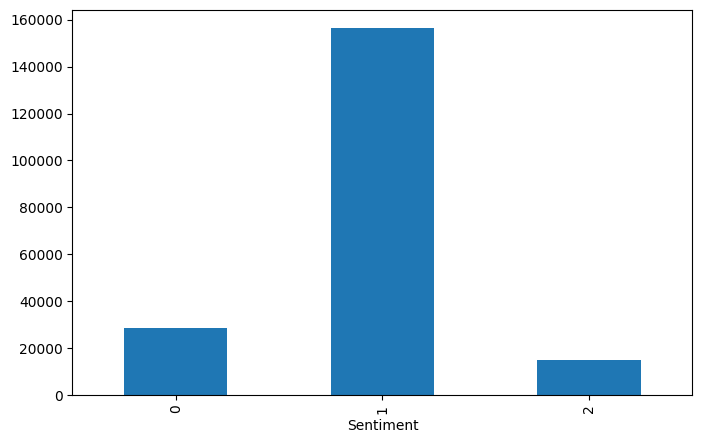

In [25]:
reviews['Sentiment'].value_counts().sort_index().plot(kind = 'bar', label ='Review count by score', figsize =(8,5))

In [26]:
reviews['Sentiment'].value_counts().sort_index()

Sentiment
0     28558
1    156413
2     15029
Name: count, dtype: int64

In [27]:
reviews.describe()

,Score,Sentiment
count,200000.000000,200000.000000
mean,4.187800,0.932355
std,1.305998,0.461909
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,2.000000


### Handling Class imbalance using Under Sampling technique 

In [28]:
reviews['Sentiment'].value_counts().sort_index()

Sentiment
0     28558
1    156413
2     15029
Name: count, dtype: int64

In [29]:
#Imbalance Class distribution- Solving using under sampling 

major = reviews[reviews['Sentiment'] == 1]
minor = reviews[reviews['Sentiment'] != 1]

downsampling = resample(major , replace =False, n_samples = len(minor), random_state = 33) 

Balanced_reviews = pd.concat([minor,downsampling])

In [30]:
Balanced_reviews.head()

,Score,Text,clean_text,Score_label,Sentiment
2,3,A little less than I expected. It tends to ha...,little less expect tend muddy taste not expect...,neutral,2
3,2,"First there was Frosted Mini-Wheats, in origin...",first frost mini wheats original size frost mi...,Bad,0
14,1,Simply awful. This product should be taken of...,simply awful product take market immediately a...,Bad,0
22,1,It sure would be nice if they stated ANYWHERE ...,sure would nice state anywhere description cof...,Bad,0
27,1,"Disappointingly, this is IMITATION Almond Extr...",disappointingly imitation almond extract terri...,Bad,0


### Feature Extraction / Vectorisation 

In [31]:
vector = TfidfVectorizer(max_features = 5000)
X = vector.fit_transform(Balanced_reviews['clean_text']) # Independent Variable

In [32]:
Balanced_reviews['clean_text'].shape

(87174,)

<Axes: xlabel='Sentiment'>

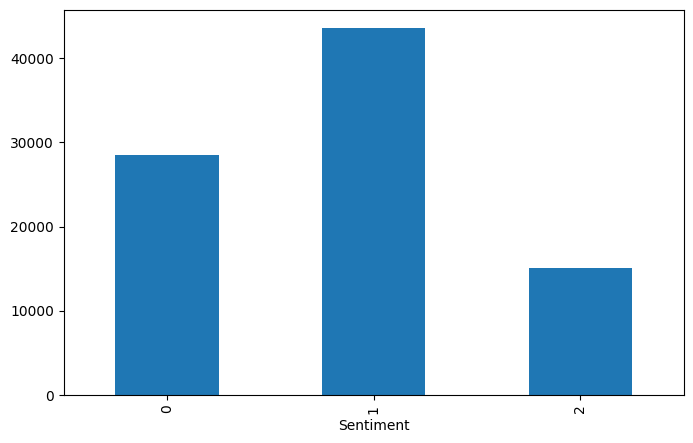

In [33]:
Balanced_reviews['Sentiment'].value_counts().sort_index().plot(kind = 'bar', label ='Review count by score', figsize =(8,5))

In [34]:
y = Balanced_reviews['Sentiment'] # dependent variable 

In [35]:
Balanced_reviews['Score_label'].value_counts()

Score_label
Good       43587
Bad        28558
neutral    15029
Name: count, dtype: int64

## Train/Test Split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify = y )

## Model Training 

In [37]:
logistic_model = LogisticRegression()
NB_model = MultinomialNB()
svm_model = LinearSVC()
Rtree_model = RandomForestClassifier()

logistic_model.fit(X_train,y_train)
NB_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)
Rtree_model.fit(X_train,y_train)

Logistic_y_pred = logistic_model.predict(X_test)
NB_y_pred=NB_model.predict(X_test)
svm_y_pred=svm_model.predict(X_test)
Rtree_y_pred=Rtree_model.predict(X_test)

In [38]:
print(classification_report(y_test,Logistic_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      7140
           1       0.81      0.89      0.85     10897
           2       0.54      0.33      0.41      3757

    accuracy                           0.76     21794
   macro avg       0.70      0.67      0.67     21794
weighted avg       0.74      0.76      0.75     21794



In [39]:
print(classification_report(y_test,NB_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72      7140
           1       0.70      0.94      0.80     10897
           2       0.62      0.09      0.16      3757

    accuracy                           0.71     21794
   macro avg       0.69      0.57      0.56     21794
weighted avg       0.70      0.71      0.66     21794



In [40]:
print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      7140
           1       0.81      0.89      0.85     10897
           2       0.54      0.32      0.40      3757

    accuracy                           0.76     21794
   macro avg       0.70      0.66      0.67     21794
weighted avg       0.74      0.76      0.74     21794



In [41]:
print(classification_report(y_test,Rtree_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      7140
           1       0.77      0.93      0.85     10897
           2       0.91      0.30      0.46      3757

    accuracy                           0.78     21794
   macro avg       0.82      0.68      0.69     21794
weighted avg       0.79      0.78      0.76     21794



In [42]:
cm = confusion_matrix(y_test, Rtree_y_pred)
print(cm)

[[ 5624  1450    66]
 [  677 10178    42]
 [ 1053  1560  1144]]


In [43]:
Balanced_reviews['Sentiment'].value_counts()

Sentiment
1    43587
0    28558
2    15029
Name: count, dtype: int64

In [44]:
def test_new_text(num):
    step1 = cleaning(review['Text'][num])
    step2 = tokenisation(step1)
    step3 = remove_stopwords(step2)
    step4 = lemmatisation(step3)
    step5 = vector.transform([step4])
    prediction = Rtree_model.predict(step5)

    label= {
        0: "Negative",
        2: "Neutral",
        1: "Positive" }

    print(review['Text'][num],'\n''\n','Sentiment: '+label[prediction[0]])



In [45]:
test_new_text(137778)

Not very fresh....Experation date less than 2 months?<br />The experation is on each individual SlimJim so you can't check that until you open the box.<br />Each individual seemed different from the other. Some were tough and hard to chew and some were ok.<br />I'll probably buy at the store from now on. 

 Sentiment: Neutral


In [46]:
test_new_text(646)

My male Maltese dog had been enjoying the Old Roy's Puppy Biscuits from Walmart.  Then I couldn't find them.  I was desperate to find a treat that would measure up.  I ordered six bags of the peanut butter and crossed my fingers.<br /><br />They arrived, and my little guy loves them.  He gets one heart-shaped biscuit at bedtime.  He sleeps in a crate.  When he hears me touch the bag of treats, he beats a path to his crate in high excitement.  They are a BIG hit with my him.  They are well worth the price.  They are high quality and I can even smell peanuts in them. 

 Sentiment: Positive


In [47]:
test_new_text(99)

I fed this to my Golden Retriever and he hated it.  He wouldn't eat it, and when he did, it gave him terrible diarrhea.  We will not be buying this again.  It's also super expensive. 

 Sentiment: Negative


In [48]:
test_new_text(4999) # Error

I love these cookies. I am on the paleo diet right now and these cookies are what I look forward too. I do like the taste of the tropical one the best. They all have different taste but if you want something that is grain free and gluten free then this is the right place. I expected the taste to be different and it is. Other reviewers seem to expect them to taste like oreos or chips ahoy. Of course not.<br /><br />When I eat them, I don't even feel bad about it because my body welcomes them. They don't make me crash either and feel like I ate junk food. It is a good indicator that these were made from all natural ingredients. I wish I had these cookies close to me. I'd buy them every single day! 

 Sentiment: Positive


# Bidirectional LSTM

In [49]:
Balanced_reviews.head()

,Score,Text,clean_text,Score_label,Sentiment
2,3,A little less than I expected. It tends to ha...,little less expect tend muddy taste not expect...,neutral,2
3,2,"First there was Frosted Mini-Wheats, in origin...",first frost mini wheats original size frost mi...,Bad,0
14,1,Simply awful. This product should be taken of...,simply awful product take market immediately a...,Bad,0
22,1,It sure would be nice if they stated ANYWHERE ...,sure would nice state anywhere description cof...,Bad,0
27,1,"Disappointingly, this is IMITATION Almond Extr...",disappointingly imitation almond extract terri...,Bad,0


In [50]:
tokenizer = Tokenizer(num_words=300, oov_token='<OOV>')
tokenizer.fit_on_texts(Balanced_reviews['clean_text'])

sequences = tokenizer.texts_to_sequences(Balanced_reviews['clean_text'])  # Convert text to sequences of integers
padded_sequences = pad_sequences(sequences, maxlen=300, padding='post', truncating='post')

In [51]:

X_train, X_test, y_train, y_test = train_test_split(padded_sequences,Balanced_reviews['Sentiment'], 
                                                    test_size=0.2, random_state=42, stratify=Balanced_reviews['Sentiment'])

In [52]:
model = Sequential([
    Embedding(input_dim=300, output_dim=128, input_length=300),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # For multi-class classification
])
model.build(input_shape=(None, 300))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 300, 128)            │          38,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145,667 (569.01 KB)

 Trainable params: 145,667 (569.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)


Epoch 1/5
545/545 ━━━━━━━━━━━━━━━━━━━━ 807s 1s/step - accuracy: 0.5935 - loss: 0.8941 - val_accuracy: 0.6790 - val_loss: 0.7558
Epoch 2/5
427/545 ━━━━━━━━━━━━━━━━━━━━ 2:58 2s/step - accuracy: 0.6880 - loss: 0.7352